# Introducing the `set_output` API
- pandas 데이터프레임을 출력하도록 트랜스포머를 구성하는 `set_output` API를 보임

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
1,4.9,3.0,1.4,0.2
8,4.4,2.9,1.4,0.2
93,5.0,2.3,3.3,1.0
106,4.9,2.5,4.5,1.7


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")

scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,-0.894264,0.798301,-1.271411,-1.327605
12,-1.244466,-0.086944,-1.327407,-1.459074
48,-0.660797,1.462234,-1.271411,-1.327605
23,-0.894264,0.576989,-1.159419,-0.933197
81,-0.427329,-1.414810,-0.039497,-0.275851


In [3]:
scaler2 = StandardScaler()

scaler2.fit(X_train)
X_test_np = scaler2.transform(X_test)
print(f"Default output type: {type(X_test_np).__name__}")

scaler2.set_output(transform="pandas")
X_test_df = scaler2.transform(X_test)
print(f"Configured pandas output type: {type(X_test_df).__name__}")

Default output type: ndarray
Configured pandas output type: DataFrame


In [4]:
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    StandardScaler(), SelectPercentile(percentile=75), LogisticRegression()
)
clf.set_output(transform="pandas")
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectpercentile', SelectPercentile(percentile=75)),
                ('logisticregression', LogisticRegression())])

In [5]:
clf[-1].feature_names_in_

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype=object)

In [6]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [7]:
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

set_config(transform_output="pandas")

num_pipe = make_pipeline(SimpleImputer(), StandardScaler())
num_cols = ["age", "fare"]
ct = ColumnTransformer(
    (
        ("numerical", num_pipe, num_cols),
        (
            "categorical",
            OneHotEncoder(
                sparse_output=False, drop="if_binary", handle_unknown="ignore"
            ),
            ["embarked", "sex", "pclass"],
        ),
    ),
    verbose_feature_names_out=False,
)
clf = make_pipeline(ct, SelectPercentile(percentile=50), LogisticRegression())
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.774390243902439

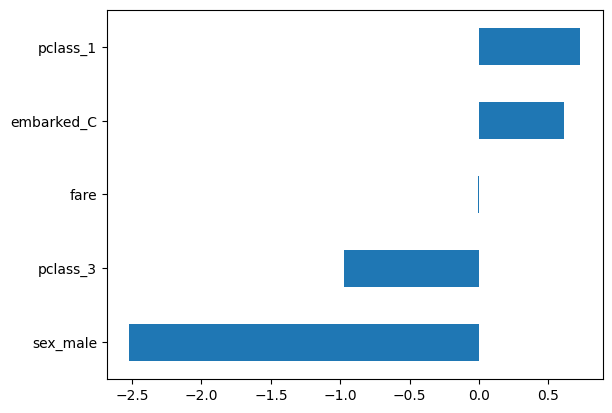

In [8]:
import pandas as pd

log_reg = clf[-1]
coef = pd.Series(log_reg.coef_.ravel(), index=log_reg.feature_names_in_)
_ = coef.sort_values().plot.barh()

In [9]:
set_config(transform_output="default")

In [10]:
from sklearn import config_context

scaler = StandardScaler()
scaler.fit(X_train[num_cols])

StandardScaler()

In [11]:
with config_context(transform_output="pandas"):
    # 변환의 출력은 pandas DataFrame이다
    X_test_scaled = scaler.transform(X_test[num_cols])
X_test_scaled.head()

,age,fare
1273,-0.821641,-0.303643
81,2.750797,0.704931
791,-0.890341,-0.508608
898,-0.752940,-0.646178
881,-0.615538,-0.497826


In [12]:
X_test_scaled = scaler.transform(X_test[num_cols])
X_test_scaled[:5]

array([[-0.82164063, -0.30364314],
       [ 2.75079713,  0.70493076],
       [-0.89034136, -0.5086082 ],
       [-0.75293991, -0.64617768],
       [-0.61553845, -0.49782597]])